In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas_profiling

In [84]:
import matplotlib as mpl

In [85]:
import matplotlib.pyplot as plt

In [73]:
epl_dataset = pd.read_csv("European_Premier_League.csv")

In [4]:
epl_dataset.shape

(9664, 11)

In [5]:
epl_dataset.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Season'],
      dtype='object')

In [6]:
epl_dataset.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [7]:
epl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [8]:
epl_dataset.describe(include='all')

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
count,9664,9664,9664,9664,9664.000000,9664.000000,9664,8740.000000,8740.000000,8740,9664
unique,1,2572,50,50,NaN,NaN,3,NaN,NaN,3,25
top,E0,17/04/95,Liverpool,Liverpool,NaN,NaN,H,NaN,NaN,D,1994-95
freq,9664,11,479,479,NaN,NaN,4461,NaN,NaN,3679,462
mean,NaN,NaN,NaN,NaN,1.523903,1.121482,NaN,0.685469,0.488444,NaN,NaN
std,NaN,NaN,NaN,NaN,1.301671,1.121667,NaN,0.833581,0.710524,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,NaN


In [10]:
epl_dataset.isnull().sum()

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG        924
HTAG        924
HTR         924
Season        0
dtype: int64

In [11]:
epl_dataset.isnull().sum()/epl_dataset.shape[0]

Div         0.000000
Date        0.000000
HomeTeam    0.000000
AwayTeam    0.000000
FTHG        0.000000
FTAG        0.000000
FTR         0.000000
HTHG        0.095613
HTAG        0.095613
HTR         0.095613
Season      0.000000
dtype: float64

In [19]:
pre_profile = pandas_profiling.ProfileReport(epl_dataset)

In [20]:
pre_profile.to_file("epl_before_preprocessing.html")

In [74]:
epl_dataset.drop(columns='Div', inplace=True)  #Dropping Div column since it has only single data

In [13]:
epl_dataset['Date'].str.len().unique()

array([ 8,  9, 10], dtype=int64)

In [14]:
epl_dataset[epl_dataset['Date'].str.len() == 8]['Date'].head(2)

0    14/08/93
1    14/08/93
Name: Date, dtype: object

In [60]:
epl_dataset[epl_dataset['Date'].str.len() == 8].head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94


In [61]:
epl_dataset[epl_dataset['Date'].str.len() == 9].head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
66,11/9/1993,Arsenal,Ipswich,4,0,H,NaN,NaN,NaN,1993-94
67,11/9/1993,Aston Villa,Coventry,0,0,D,NaN,NaN,NaN,1993-94


In [15]:
epl_dataset[epl_dataset['Date'].str.len() == 10]['Date'].head(2)

205    11/12/1993
206    11/12/1993
Name: Date, dtype: object

In [60]:
#epl_dataset['Date'] = epl_dataset['Date'].apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))

In [75]:
epl_dataset['Date'] = pd.to_datetime(epl_dataset['Date'], dayfirst=True)

In [72]:
epl_dataset['Date']

0      1993-08-14
1      1993-08-14
2      1993-08-14
3      1993-08-14
4      1993-08-14
          ...    
9659   2018-05-13
9660   2018-05-13
9661   2018-05-13
9662   2018-05-13
9663   2018-05-13
Name: Date, Length: 9664, dtype: datetime64[ns]

In [17]:
epl_dataset.loc[epl_dataset['HTHG'].isnull() & (epl_dataset['FTHG'] == 0), 'HTHG'] = 0

In [18]:
epl_dataset[epl_dataset['HTHG'].isnull()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
1,14/08/1993,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,14/08/1993,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,14/08/1993,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,14/08/1993,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
7,14/08/1993,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...
919,14/05/1995,Norwich,Aston Villa,1,1,D,NaN,NaN,NaN,1994-95
920,14/05/1995,Sheffield Weds,Ipswich,4,1,H,NaN,NaN,NaN,1994-95
921,14/05/1995,Southampton,Leicester,2,2,D,NaN,NaN,NaN,1994-95
922,14/05/1995,Tottenham,Leeds,1,1,D,NaN,NaN,NaN,1994-95


In [19]:
epl_dataset.loc[epl_dataset['HTAG'].isnull() & (epl_dataset['FTAG'] == 0), 'HTAG'] = 0

In [20]:
epl_dataset[epl_dataset['HTAG'].isnull()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/1993,Arsenal,Coventry,0,3,A,0.0,NaN,NaN,1993-94
1,14/08/1993,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,14/08/1993,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
4,14/08/1993,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
5,14/08/1993,Newcastle,Tottenham,0,1,A,0.0,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...
919,14/05/1995,Norwich,Aston Villa,1,1,D,NaN,NaN,NaN,1994-95
920,14/05/1995,Sheffield Weds,Ipswich,4,1,H,NaN,NaN,NaN,1994-95
921,14/05/1995,Southampton,Leicester,2,2,D,NaN,NaN,NaN,1994-95
922,14/05/1995,Tottenham,Leeds,1,1,D,NaN,NaN,NaN,1994-95


In [24]:
epl_dataset.loc[epl_dataset['HTAG'].isnull() | epl_dataset['HTHG'].isnull()].shape

(830, 10)

In [23]:
epl_dataset[epl_dataset['HTAG'].isnull() | epl_dataset['HTHG'].isnull()]['Season'].unique()

array(['1993-94', '1994-95'], dtype=object)

In [76]:
epl_dataset.loc[epl_dataset['HTAG'].isnull(), 'HTAG'] = 0

In [77]:
epl_dataset.loc[epl_dataset['HTHG'].isnull(), 'HTHG'] = 0

In [78]:
epl_dataset.loc[epl_dataset['HTAG'].isnull() | epl_dataset['HTHG'].isnull()].shape

(0, 10)

In [79]:
epl_dataset.loc[epl_dataset['HTR'].isnull(), 'HTR'] = 'D'

In [40]:
epl_dataset.FTHG.dtype

dtype('int64')

In [80]:
epl_dataset['HTAG'] = epl_dataset['HTAG'].astype('int64')
epl_dataset['HTHG'] = epl_dataset['HTHG'].astype('int64')

In [81]:
epl_dataset

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,1993-08-14,Arsenal,Coventry,0,3,A,0,0,D,1993-94
1,1993-08-14,Aston Villa,QPR,4,1,H,0,0,D,1993-94
2,1993-08-14,Chelsea,Blackburn,1,2,A,0,0,D,1993-94
3,1993-08-14,Liverpool,Sheffield Weds,2,0,H,0,0,D,1993-94
4,1993-08-14,Man City,Leeds,1,1,D,0,0,D,1993-94
...,...,...,...,...,...,...,...,...,...,...
9659,2018-05-13,Newcastle,Chelsea,3,0,H,1,0,H,2017-18
9660,2018-05-13,Southampton,Man City,0,1,A,0,0,D,2017-18
9661,2018-05-13,Swansea,Stoke,1,2,A,1,2,A,2017-18
9662,2018-05-13,Tottenham,Leicester,5,4,H,1,2,A,2017-18


In [82]:
post_profile = pandas_profiling.ProfileReport(epl_dataset)

In [83]:
post_profile.to_file("epl_after_preprocessing.html")

In [86]:
epl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9664 non-null   datetime64[ns]
 1   HomeTeam  9664 non-null   object        
 2   AwayTeam  9664 non-null   object        
 3   FTHG      9664 non-null   int64         
 4   FTAG      9664 non-null   int64         
 5   FTR       9664 non-null   object        
 6   HTHG      9664 non-null   int64         
 7   HTAG      9664 non-null   int64         
 8   HTR       9664 non-null   object        
 9   Season    9664 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 755.1+ KB


In [87]:
a = epl_dataset['Date']

In [100]:
a.dt.month.unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [131]:
a.dt.month.unique().argsort()

array([5, 6, 7, 8, 9, 0, 1, 2, 3, 4], dtype=int64)

In [164]:
plt.style.use('seaborn-whitegrid')

In [192]:
fig.clear

<bound method Figure.clear of <Figure size 1080x432 with 2 Axes>>

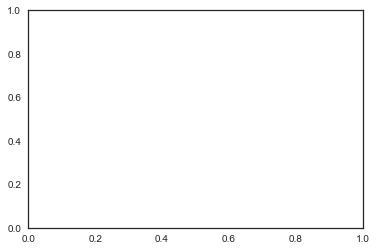

In [194]:
fig, ax = plt.subplots(1,1)

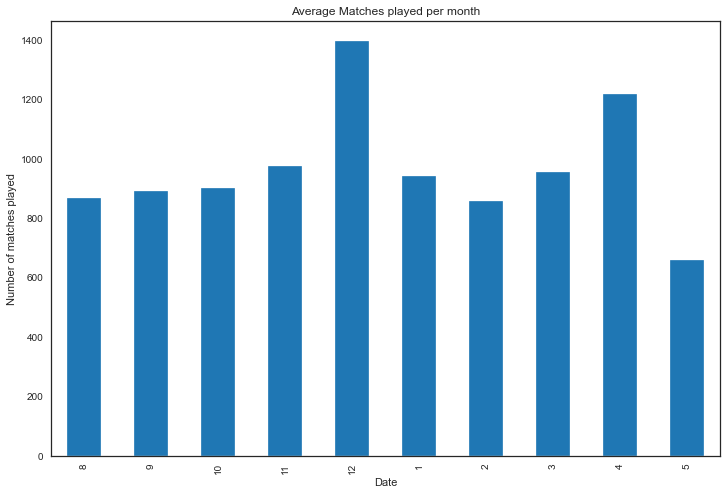

In [216]:
    plt.xlabel("Months")
    plt.ylabel("Number of matches played")
    plt.title("Average Matches played per month")
    epl_dataset.groupby(epl_dataset['Date'].dt.month)['Date'].count().iloc[epl_dataset['Date'].dt.month.unique().argsort()].plot.bar(figsize=(12,8))

In [250]:
epl_dataset.groupby(epl_dataset['Date'].dt.month)['Date'].count().iloc[epl_dataset['Date'].dt.month.unique().argsort()]

Date
8      868
9      891
10     901
11     974
12    1395
1      943
2      857
3      956
4     1219
5      660
Name: Date, dtype: int64

In [159]:
a.dt.month_name().unique()

array(['August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May'], dtype=object)

In [251]:
epl_dataset.groupby(a.dt.month)['Date'].count()

AttributeError: Can only use .dt accessor with datetimelike values

In [104]:
a.groupby(a.dt.month)

Date
1      943
2      857
3      956
4     1219
5      660
8      868
9      891
10     901
11     974
12    1395
Name: Date, dtype: int64

In [105]:
g = a.groupby(a.dt.month)

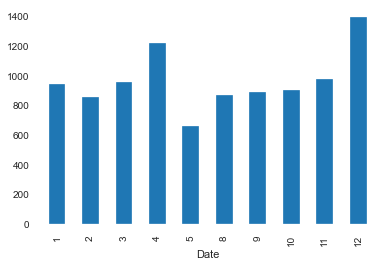

In [135]:
g.count().plot.bar(xticks=[8,9,10,11,12,1,2,3,4,5])

In [226]:
goals_per_month = epl_dataset.groupby(epl_dataset['Date'].dt.month)['FTHG','FTAG'].sum().iloc[epl_dataset['Date'].dt.month.unique().argsort()]

In [237]:
goals_per_month['Total'] = goals_per_month['FTHG'] + goals_per_month['FTAG'] 

KeyError: 'FTHG'

In [238]:
goals_per_month.rename(columns={"FTHG" : "Home Goals", "FTAG" : "Away Goals", "Total" : "Total Goals"}, inplace=True)

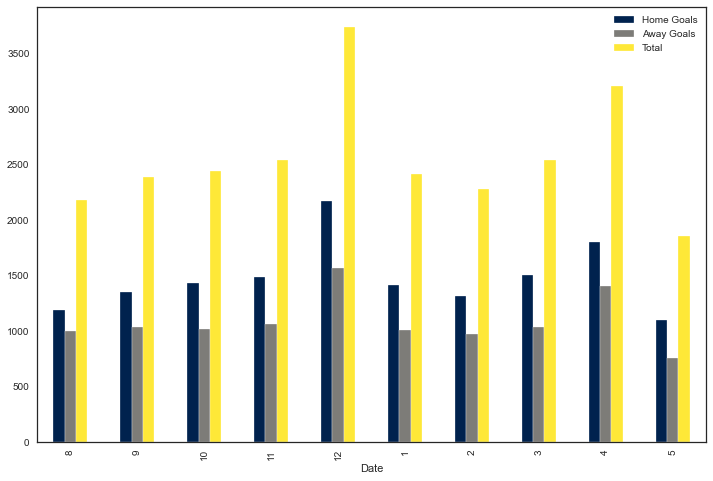

In [235]:
goals_per_month.plot(y=["Home Goals", "Away Goals", "Total"], kind="bar", figsize=(12,8), cmap="cividis")

In [239]:
goals_per_match = pd.DataFrame()
goals_per_match['Home Goals'] = goals_per_month['Home Goals']/matches_per_month
goals_per_match['Away Goals'] = goals_per_month['Away Goals']/matches_per_month
goals_per_match['Total Goals'] = goals_per_month['Total Goals']/matches_per_month

In [249]:
goals_per_match

,Home Goals,Away Goals,Total Goals
Date,,,
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
10,NaN,NaN,NaN
11,NaN,NaN,NaN


In [252]:
matches_per_month = epl_dataset.groupby(epl_dataset['Date'].dt.month)['Date'].count().iloc[epl_dataset['Date'].dt.month.unique().argsort()]

In [253]:
goals_per_match = pd.DataFrame()
goals_per_match['Home Goals'] = goals_per_month['Home Goals']/matches_per_month
goals_per_match['Away Goals'] = goals_per_month['Away Goals']/matches_per_month
goals_per_match['Total Goals'] = goals_per_month['Total Goals']/matches_per_month